In [1]:
# Final Project with Model

# App Rating Prediction

In [2]:
#import necessary library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
#check working directory

os.getcwd()

'C:\\Users\\jeeva\\Documents\\Yamuna\\Learning\\Python\\Analytics\\App Rating Proj\\App Rating Prediction'

## Question 1
### 1. Load the data file using pandas. 

In [4]:
#read the googleplaystore dataset

GoogleApp = pd.read_csv("googleplaystore.csv")
GoogleApp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [5]:
#view the dataset shape

GoogleApp.shape

(10841, 13)

In [6]:
#view all the columns present in the dataset

GoogleApp.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#view the datatype of all columns present in the dataset

GoogleApp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
#view the descriptive statistics of the dataframe

GoogleApp.describe(include = 'all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Question 2
### 2. Check for null values in the data. Get the number of null values for each column.

In [9]:
#view the null values in the dataframe

GoogleApp.isnull()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,False,False,False,False,False,False,False,False,False,False,False,False,False
10837,False,False,False,False,False,False,False,False,False,False,False,False,False
10838,False,False,True,False,False,False,False,False,False,False,False,False,False
10839,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
#view the number of Null values in each column

print("Number of Null Values in each column")
NullValues = GoogleApp.isnull().sum(axis=0)
NullValues

Number of Null Values in each column


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

## Question 3
### 3. Drop records with nulls in any of the columns.

In [11]:
#view the records with null values in any of the columns

NullRec = GoogleApp.isnull().sum(axis=1).astype('bool')
GoogleApp[NullRec]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10824,Cardio-FR,MEDICAL,NaN,67,82M,"10,000+",Free,0,Everyone,Medical,"July 31, 2018",2.2.2,4.4 and up
10825,Naruto & Boruto FR,SOCIAL,NaN,7,7.7M,100+,Free,0,Teen,Social,"February 2, 2018",1.0,4.0 and up
10831,payermonstationnement.fr,MAPS_AND_NAVIGATION,NaN,38,9.8M,"5,000+",Free,0,Everyone,Maps & Navigation,"June 13, 2018",2.0.148.0,4.0 and up
10835,FR Forms,BUSINESS,NaN,0,9.6M,10+,Free,0,Everyone,Business,"September 29, 2016",1.1.5,4.0 and up


In [12]:
#View the number of records with Null values in any of the columns

GoogleApp[NullRec].shape

(1481, 13)

In [13]:
#Drop the Null values (NaN) in the following columns : Rating, Type, Content Rating, Curernt Version, Android Version. 
#Reset the index numbers in the DataFrame GoogleApp

GoogleApp = GoogleApp.dropna().reset_index(drop=True)
GoogleApp

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [14]:
#view the number of Null values in each column after fill in Rating.

NullValues = GoogleApp.isnull().sum(axis=0)
NullValues

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [15]:
#view the dataset shape

GoogleApp.shape

(9360, 13)

## Question 4
### 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them: 
#### 1. Size column has sizes in Kb as well as Mb. To analyze, you’ll need to convert these to numeric.
##### 1. Extract the numeric value from the column

In [16]:
#Replace the value k,M with "" and Varies with device' with 0 and 1000+ with 1000 in the Size column.
#Create a new field 'Size_numeric'to save the numeric values of the Size column.

GoogleApp['Size_numeric'] = GoogleApp.Size.str.replace('k',"").str.replace('M',"").str.replace('Varies with device','0').str.replace('1,000+','1000')
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Size_numeric']]

<ipython-input-16-dbe42ccbc7a3>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  GoogleApp['Size_numeric'] = GoogleApp.Size.str.replace('k',"").str.replace('M',"").str.replace('Varies with device','0').str.replace('1,000+','1000')


,App,Category,Rating,Reviews,Size,Size_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,19
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,14
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,25
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,2.8
...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,2.6
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,53
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,3.6
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,0


In [17]:
#Convert the Size column into float.
#As the values in the Size column has decimal values, convert the 'Size_numeric' field into float datatype.

GoogleApp['Size_numeric_float'] = GoogleApp.Size_numeric.astype('float')
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Size_numeric','Size_numeric_float']]

,App,Category,Rating,Reviews,Size,Size_numeric,Size_numeric_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,19,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,14,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,8.7,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,25,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,2.8,2.8
...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,2.6,2.6
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,53,53.0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,3.6,3.6
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,0,0.0


##### 2. Multiply the value by 1,000, if size is mentioned in Mb

In [18]:
#Find the location of 'M' in the Size Column.
#Store the value in the 'Mb_exists' column in the DataFrame 'GoogleApp'.

GoogleApp['Mb_exists'] = GoogleApp.Size.str.find('M')
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Mb_exists','Size_numeric','Size_numeric_float']]

,App,Category,Rating,Reviews,Size,Mb_exists,Size_numeric,Size_numeric_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,2,19,19.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,2,14,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,3,8.7,8.7
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,2,25,25.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,3,2.8,2.8
...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,3,2.6,2.6
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,2,53,53.0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,3,3.6,3.6
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,-1,0,0.0


In [19]:
#Multiply the 'Size_numeric_float' value by 1000 if the Size is mentioned in 'Mb'
#Store the value in the 'Size_Multiply_1000' column in the 'GoogleApp' dataframe.

GoogleApp['Size_Multiply_1000'] = np.where(GoogleApp.Mb_exists==-1,GoogleApp.Size_numeric_float,(GoogleApp.Size_numeric_float*1000))
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Mb_exists','Size_numeric','Size_numeric_float','Size_Multiply_1000']]

,App,Category,Rating,Reviews,Size,Mb_exists,Size_numeric,Size_numeric_float,Size_Multiply_1000
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,2,19,19.0,19000.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,2,14,14.0,14000.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,3,8.7,8.7,8700.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,2,25,25.0,25000.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,3,2.8,2.8,2800.0
...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,3,2.6,2.6,2600.0
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,2,53,53.0,53000.0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,3,3.6,3.6,3600.0
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,-1,0,0.0,0.0


#### 2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).

In [20]:
#Replace the value 3.0M into 3000000 in the Reviews column.
#As all the records will be having a consistant values for the column.

GoogleApp.Reviews = GoogleApp.Reviews.str.replace('3.0M','3000000')
GoogleApp.loc[:,['App','Category','Rating','Reviews']]

<ipython-input-20-81655d6062ee>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  GoogleApp.Reviews = GoogleApp.Reviews.str.replace('3.0M','3000000')


,App,Category,Rating,Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967
...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7
9356,Sya9a Maroc - FR,FAMILY,4.5,38
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114


In [21]:
#Convert the Reviews column into int.
#As the values in the Reviews column has decimal values, convert the 'Reviews' field into float datatype.

GoogleApp['Reviews_int'] = GoogleApp.Reviews.astype('int')
GoogleApp.loc[:,['App','Category','Rating','Reviews','Reviews_int']]

,App,Category,Rating,Reviews,Reviews_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,159
1,Coloring book moana,ART_AND_DESIGN,3.9,967,967
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,87510
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,215644
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,967
...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,7
9356,Sya9a Maroc - FR,FAMILY,4.5,38,38
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,4
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,114


#### 3. Installs field is currently stored as string and has values like 1,000,000+.
#####  1. Treat 1,000,000+ as 1,000,000.
##### 2. remove ‘+’, ‘,’ from the field, convert it to integer.

In [22]:
#Replace the value +,, into "" and value 'Free' into 0 as 1 install is made Free.
#Store the values in a separate column 'Installs_numeric'

GoogleApp['Installs_numeric'] = GoogleApp.Installs.str.replace('+',"").str.replace(',',"").str.replace('Free',"0")
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Installs','Installs_numeric']]

<ipython-input-22-9a8b414c5b05>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  GoogleApp['Installs_numeric'] = GoogleApp.Installs.str.replace('+',"").str.replace(',',"").str.replace('Free',"0")


,App,Category,Rating,Reviews,Size,Installs,Installs_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",100000
...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,500
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",5000
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,100
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",1000


In [23]:
#Convert the Installs_numeric into integer.

GoogleApp['Installs_int'] = GoogleApp.Installs_numeric.astype('int')
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Installs','Installs_numeric','Installs_int']]

,App,Category,Rating,Reviews,Size,Installs,Installs_numeric,Installs_int
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",10000,10000
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",500000,500000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",5000000,5000000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",50000000,50000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",100000,100000
...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,500,500
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",5000,5000
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,100,100
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",1000,1000


#### 4. Price field is a string and has symbol. Remove dollar sign, and convert it to numeric.

In [24]:
#Replace $ with "" and Everyone with 0.
#Store the numeric values in a separate column 'Price_numeric'.

GoogleApp['Price_numeric'] = GoogleApp.Price.str.replace('$',"").str.replace('Everyone','0')
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Installs','Type','Price','Price_numeric']]

<ipython-input-24-5b9d4e549d3d>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  GoogleApp['Price_numeric'] = GoogleApp.Price.str.replace('$',"").str.replace('Everyone','0')


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Price_numeric
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,0
...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,0
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,0
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,0


In [25]:
#Convert the Price Values into float as most of the price values has decimal values.
#Store the float price values in the same GoogleApp DataFrame

GoogleApp['Price_float'] = GoogleApp.Price_numeric.astype('float')
GoogleApp.loc[:,['App','Category','Rating','Reviews','Size','Installs','Type','Price','Price_numeric','Price_float']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Price_numeric,Price_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,0,0.0
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,0,0.0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,0,0.0
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,0,0.0


## Question 5
### 5. Sanity checks:
#### 1. Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.

In [26]:
#Filter the Rows with the Rating (1-5) and store in a new DataFrame GoogleApp_filtred

GoogleApp_filtred = GoogleApp[((GoogleApp.Rating >=1) & (GoogleApp.Rating<=5))]
GoogleApp_filtred

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Size_numeric,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19,19.0,2,19000.0,159,10000,10000,0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,14,14.0,2,14000.0,967,500000,500000,0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,8.7,8.7,3,8700.0,87510,5000000,5000000,0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,4.2 and up,25,25.0,2,25000.0,215644,50000000,50000000,0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,2.8,2.8,3,2800.0,967,100000,100000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,...,4.1 and up,2.6,2.6,3,2600.0,7,500,500,0,0.0
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,4.1 and up,53,53.0,2,53000.0,38,5000,5000,0,0.0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,4.1 and up,3.6,3.6,3,3600.0,4,100,100,0,0.0
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,Varies with device,0,0.0,-1,0.0,114,1000,1000,0,0.0


#### 2. Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.

In [27]:
#Filter the records with Reviews <= Installs and stored in the GoogleApp_filtred DataFrame

GoogleApp_filtred = GoogleApp_filtred[(GoogleApp_filtred.Reviews_int <= GoogleApp_filtred.Installs_int)]
GoogleApp_filtred

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Size_numeric,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19,19.0,2,19000.0,159,10000,10000,0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,14,14.0,2,14000.0,967,500000,500000,0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,8.7,8.7,3,8700.0,87510,5000000,5000000,0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,4.2 and up,25,25.0,2,25000.0,215644,50000000,50000000,0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,2.8,2.8,3,2800.0,967,100000,100000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,...,4.1 and up,2.6,2.6,3,2600.0,7,500,500,0,0.0
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,4.1 and up,53,53.0,2,53000.0,38,5000,5000,0,0.0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,4.1 and up,3.6,3.6,3,3600.0,4,100,100,0,0.0
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,Varies with device,0,0.0,-1,0.0,114,1000,1000,0,0.0


#### 3. For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [28]:
#Filter the records with Type == 'Free' and Price > 0.0 and store all the other records in the GoogleApp_filtred dataframe.

GoogleApp_filtred =  GoogleApp_filtred[~((GoogleApp_filtred.Type == 'Free') & (GoogleApp_filtred.Price_float > 0.0))]
GoogleApp_filtred

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Android Ver,Size_numeric,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,19,19.0,2,19000.0,159,10000,10000,0,0.0
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,4.0.3 and up,14,14.0,2,14000.0,967,500000,500000,0,0.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,4.0.3 and up,8.7,8.7,3,8700.0,87510,5000000,5000000,0,0.0
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,4.2 and up,25,25.0,2,25000.0,215644,50000000,50000000,0,0.0
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,4.4 and up,2.8,2.8,3,2800.0,967,100000,100000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,...,4.1 and up,2.6,2.6,3,2600.0,7,500,500,0,0.0
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,4.1 and up,53,53.0,2,53000.0,38,5000,5000,0,0.0
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,4.1 and up,3.6,3.6,3,3600.0,4,100,100,0,0.0
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,Varies with device,0,0.0,-1,0.0,114,1000,1000,0,0.0


## Question 5
### 5. Performing univariate analysis:
#### -- Boxplot for Price
##### ---- Are there any outliers? Think about the price of usual apps on Play Store.

In [29]:
#View the descriptive statistics for price column.

GoogleApp_filtred.Price_float.describe(include = 'all')

count    9353.000000
mean        0.961467
std        15.827539
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       400.000000
Name: Price_float, dtype: float64

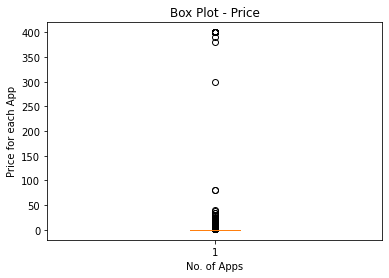

In [30]:
#Boxplot for Price

plt.title('Box Plot - Price')
plt.xlabel('No. of Apps')
plt.ylabel('Price for each App')
plt.boxplot(GoogleApp_filtred.Price_float)
plt.show()

In [31]:
# Yes there are Outliers in the data. The Q1,Q2,Q3 – has same value 0.0.
#Minimum value – 0.0
#Maximum value – 400.0
#IQR – 0.0.
#As most of the values are less than price 50, there is no box in the box plot and the values are plotted in lower whiskers. There are few apps which are very highly priced, above the price of 300.


In [32]:
#sns.boxplot(GoogleApp_filtred.Price_float)

#### -- Boxplot for Reviews
##### ---- Are there any apps with very high number of reviews? Do the values seem right?

In [33]:
#View the descriptive statistics for reviews column.

GoogleApp_filtred.Reviews_int.describe(include = 'all')

count    9.353000e+03
mean     5.147606e+05
std      3.146169e+06
min      1.000000e+00
25%      1.870000e+02
50%      5.967000e+03
75%      8.174700e+04
max      7.815831e+07
Name: Reviews_int, dtype: float64

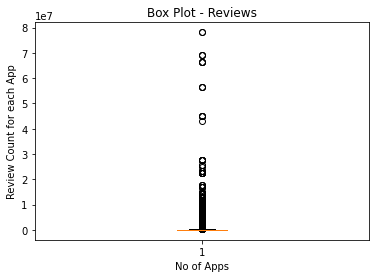

In [34]:
#Boxplot for Reviews

plt.title('Box Plot - Reviews')
plt.xlabel('No of Apps')
plt.ylabel('Review Count for each App')
plt.boxplot(GoogleApp_filtred.Reviews_int)
plt.show()

In [35]:
#There are few apps with highest number of reviews. The values seem not right.
#Minimum number of reviews – 0
#Maximum number of reviews – 78158306

#Most number of Apps have less than 3 reviews.


In [36]:
#sns.boxplot(GoogleApp_filtred.Reviews_int)

#### -- Histogram for Rating
##### ---- How are the ratings distributed? Is it more toward higher ratings?

In [37]:
#View the descriptive statistics for rating column.

GoogleApp_filtred.Rating.describe(include = 'all')

count    9353.000000
mean        4.191254
std         0.515010
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

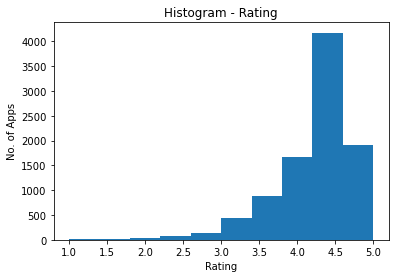

In [38]:
#Histogram for Rating

plt.title('Histogram - Rating')
plt.xlabel('Rating')
plt.ylabel('No. of Apps')
plt.hist(GoogleApp_filtred.Rating)
plt.show()

In [39]:
#Yes, Most of the rating are distributed towards the higher rating.
#Minimum Rating – 1
#Maximum Rating – 5
#Most number of Rating lies between 4 and 4.7


#### -- Histogram for Size


In [40]:
#View the descriptive statistics for Size column.

GoogleApp_filtred.Size_Multiply_1000.describe(include = 'all')

count      9353.000000
mean      18957.610660
std       23025.327915
min           0.000000
25%        2400.000000
50%        9500.000000
75%       27000.000000
max      100000.000000
Name: Size_Multiply_1000, dtype: float64

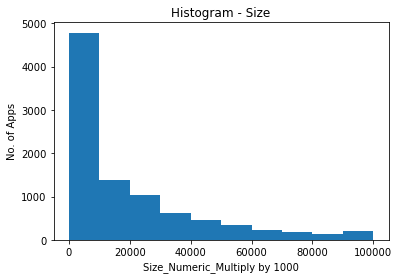

In [41]:
#Histogram for Size

plt.title('Histogram - Size')
plt.xlabel('Size_Numeric_Multiply by 1000')
plt.ylabel('No. of Apps')
plt.hist(GoogleApp_filtred.Size_Multiply_1000)
plt.show()

In [42]:
#There are few apps with very high size. Most of the Apps are less than 10000

## Question 6
### 6. Outlier treatment: 
#### 1. Price: From the box plot, it seems like there are some apps with very high price. A price of  200 for an application on the Play Store is very high and suspicious!
##### 1. Check out the records with very high price
###### 1. Is 200 indeed a high price?

In [43]:
#Display the records with Price value more than $200

GoogleApp_filtred['Price_High'] = (GoogleApp_filtred.Price_float>=200)
GoogleApp_filtred[GoogleApp_filtred['Price_High']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_numeric,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High
4036,most expensive app (H),FAMILY,4.3,6,1.5M,100+,Paid,$399.99,Everyone,Entertainment,...,1.5,1.5,3,1500.0,6,100,100,399.99,399.99,True
4189,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,...,26,26.0,2,26000.0,718,10000,10000,399.99,399.99,True
4194,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.3M,"10,000+",Paid,$400.00,Everyone,Lifestyle,...,7.3,7.3,3,7300.0,275,10000,10000,400.00,400.00,True
5042,I am rich,LIFESTYLE,3.8,3547,1.8M,"100,000+",Paid,$399.99,Everyone,Lifestyle,...,1.8,1.8,3,1800.0,3547,100000,100000,399.99,399.99,True
5045,I am Rich Plus,FAMILY,4.0,856,8.7M,"10,000+",Paid,$399.99,Everyone,Entertainment,...,8.7,8.7,3,8700.0,856,10000,10000,399.99,399.99,True
5046,I am rich VIP,LIFESTYLE,3.8,411,2.6M,"10,000+",Paid,$299.99,Everyone,Lifestyle,...,2.6,2.6,3,2600.0,411,10000,10000,299.99,299.99,True
5047,I Am Rich Premium,FINANCE,4.1,1867,4.7M,"50,000+",Paid,$399.99,Everyone,Finance,...,4.7,4.7,3,4700.0,1867,50000,50000,399.99,399.99,True
5048,I am extremely Rich,LIFESTYLE,2.9,41,2.9M,"1,000+",Paid,$379.99,Everyone,Lifestyle,...,2.9,2.9,3,2900.0,41,1000,1000,379.99,379.99,True
5049,I am Rich!,FINANCE,3.8,93,22M,"1,000+",Paid,$399.99,Everyone,Finance,...,22,22.0,2,22000.0,93,1000,1000,399.99,399.99,True
5050,I am rich(premium),FINANCE,3.5,472,965k,"5,000+",Paid,$399.99,Everyone,Finance,...,965,965.0,-1,965.0,472,5000,5000,399.99,399.99,True


In [44]:
#View the number of record with high price. More than 200.

GoogleApp_filtred[GoogleApp_filtred['Price_High']].shape

(15, 23)

###### 2.Drop these as most seem to be junk apps

In [45]:
#Filter the records with Price less than $200 in the GoogleApp_filtred dataframe

GoogleApp_filtred = GoogleApp_filtred[~(GoogleApp_filtred.Price_float>=200)]
GoogleApp_filtred

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_numeric,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,19,19.0,2,19000.0,159,10000,10000,0,0.0,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,14,14.0,2,14000.0,967,500000,500000,0,0.0,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,8.7,8.7,3,8700.0,87510,5000000,5000000,0,0.0,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,25,25.0,2,25000.0,215644,50000000,50000000,0,0.0,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,2.8,2.8,3,2800.0,967,100000,100000,0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,...,2.6,2.6,3,2600.0,7,500,500,0,0.0,False
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,53,53.0,2,53000.0,38,5000,5000,0,0.0,False
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,3.6,3.6,3,3600.0,4,100,100,0,0.0,False
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,0,0.0,-1,0.0,114,1000,1000,0,0.0,False


In [46]:
#View the number of records which are priced less than 200.

GoogleApp_filtred.shape

(9338, 23)

##### 2. Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, in fact, will skew it. Drop records having more than 2 million reviews.

In [47]:
#Display the records with Reviews more than 2M

GoogleApp_filtred['Reviews_High'] = (GoogleApp_filtred.Reviews_int > 2000000)
GoogleApp_filtred[GoogleApp_filtred['Reviews_High']]

<ipython-input-47-59165eed4324>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GoogleApp_filtred['Reviews_High'] = (GoogleApp_filtred.Reviews_int > 2000000)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High,Reviews_High
131,Wattpad 📖 Free Books,BOOKS_AND_REFERENCE,4.6,2914724,Varies with device,"100,000,000+",Free,0,Teen,Books & Reference,...,0.0,-1,0.0,2914724,100000000,100000000,0,0.0,False,True
322,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,-1,0.0,56642847,1000000000,1000000000,0,0.0,False,True
323,WhatsApp Messenger,COMMUNICATION,4.4,69119316,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,-1,0.0,69119316,1000000000,1000000000,0,0.0,False,True
325,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,-1,0.0,9642995,1000000000,1000000000,0,0.0,False,True
327,Gmail,COMMUNICATION,4.3,4604324,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,...,0.0,-1,0.0,4604324,1000000000,1000000000,0,0.0,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8076,Modern Combat 5: eSports FPS,GAME,4.3,2903386,58M,"100,000,000+",Free,0,Mature 17+,Action,...,58.0,2,58000.0,2903386,100000000,100000000,0,0.0,False,True
8622,Google Earth,TRAVEL_AND_LOCAL,4.3,2339098,Varies with device,"100,000,000+",Free,0,Everyone,Travel & Local,...,0.0,-1,0.0,2339098,100000000,100000000,0,0.0,False,True
8883,Farm Heroes Saga,FAMILY,4.4,7615646,71M,"100,000,000+",Free,0,Everyone,Casual,...,71.0,2,71000.0,7615646,100000000,100000000,0,0.0,False,True
8886,Fallout Shelter,FAMILY,4.6,2721923,25M,"10,000,000+",Free,0,Teen,Simulation,...,25.0,2,25000.0,2721923,10000000,10000000,0,0.0,False,True


In [48]:
#Filter the records with Reviews less than 2000000 reviews in the GoogleApp_filtred dataframe

GoogleApp_filtred = GoogleApp_filtred[~(GoogleApp_filtred.Reviews_int > 2000000)]
GoogleApp_filtred

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High,Reviews_High
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,19.0,2,19000.0,159,10000,10000,0,0.0,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,14.0,2,14000.0,967,500000,500000,0,0.0,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,8.7,3,8700.0,87510,5000000,5000000,0,0.0,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,25.0,2,25000.0,215644,50000000,50000000,0,0.0,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,2.8,3,2800.0,967,100000,100000,0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,...,2.6,3,2600.0,7,500,500,0,0.0,False,False
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,53.0,2,53000.0,38,5000,5000,0,0.0,False,False
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,3.6,3,3600.0,4,100,100,0,0.0,False,False
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,0.0,-1,0.0,114,1000,1000,0,0.0,False,False


In [49]:
#View the number of records which has less than 2M reviews

GoogleApp_filtred.shape

(8885, 24)

##### 3. Installs:  There seems to be some outliers in this field too. Apps having very high number of installs should be dropped from the analysis.
###### 1. Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99

In [50]:
#View the percentiles for Installs - 1, 10, 25, 50, 70, 90, 95, 99

print(f'Installs - 1st percentile : {np.percentile(GoogleApp_filtred.Installs_int,1)}')
print(f'Installs - 10th percentile : {np.percentile(GoogleApp_filtred.Installs_int,10)}')
print(f'Installs - 25th percentile : {np.percentile(GoogleApp_filtred.Installs_int,25)}')
print(f'Installs - 50th percentile : {np.percentile(GoogleApp_filtred.Installs_int,50)}')
print(f'Installs - 70th percentile : {np.percentile(GoogleApp_filtred.Installs_int,70)}')
print(f'Installs - 90th percentile : {np.percentile(GoogleApp_filtred.Installs_int,90)}')
print(f'Installs - 95th percentile : {np.percentile(GoogleApp_filtred.Installs_int,95)}')
print(f'Installs - 99th percentile : {np.percentile(GoogleApp_filtred.Installs_int,99)}')

Installs - 1st percentile : 50.0
Installs - 10th percentile : 1000.0
Installs - 25th percentile : 10000.0
Installs - 50th percentile : 500000.0
Installs - 70th percentile : 1000000.0
Installs - 90th percentile : 10000000.0
Installs - 95th percentile : 10000000.0
Installs - 99th percentile : 100000000.0


###### 2. Decide a threshold as cutoff for outlier and drop records having values more than that

In [51]:
#View the Records with Installs less than 1st percentile

GoogleApp_filtred[GoogleApp_filtred.Installs_int < np.percentile(GoogleApp_filtred.Installs_int,1)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High,Reviews_High
602,House party - live chat,DATING,1.0,1,9.2M,10+,Free,0,Mature 17+,Dating,...,9.2,3,9200.0,1,10,10,0,0.0,False,False
2336,Labs on Demand,MEDICAL,5.0,1,22M,10+,Free,0,Everyone,Medical,...,22.0,2,22000.0,1,10,10,0,0.0,False,False
2338,Tablet Reminder,MEDICAL,5.0,4,2.5M,5+,Free,0,Everyone,Medical,...,2.5,3,2500.0,4,5,5,0,0.0,False,False
2342,PrimeDelivery,MEDICAL,5.0,3,53M,10+,Free,0,Everyone,Medical,...,53.0,2,53000.0,3,10,10,0,0.0,False,False
2343,You're an Anime,MEDICAL,5.0,2,83M,10+,Free,0,Everyone,Medical,...,83.0,2,83000.0,2,10,10,0,0.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8988,Story Time FD,FAMILY,5.0,2,4.2M,10+,Free,0,Everyone 10+,Simulation,...,4.2,3,4200.0,2,10,10,0,0.0,False,False
9013,FE Mobile,BUSINESS,3.0,2,8.0M,10+,Free,0,Everyone,Business,...,8.0,3,8000.0,2,10,10,0,0.0,False,False
9152,FK CLASSIC FOR YOU,BUSINESS,5.0,1,3.5M,10+,Free,0,Everyone,Business,...,3.5,3,3500.0,1,10,10,0,0.0,False,False
9159,FK Atlantas,SPORTS,1.5,2,26M,5+,Free,0,Everyone,Sports,...,26.0,2,26000.0,2,5,5,0,0.0,False,False


In [52]:
#View the Records with Installs more than 99th percentile

GoogleApp_filtred[(GoogleApp_filtred.Installs_int > np.percentile(GoogleApp_filtred.Installs_int,99))]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Size_numeric_float,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High,Reviews_High
144,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,Varies with device,"1,000,000,000+",Free,0,Teen,Books & Reference,...,0.0,-1,0.0,1433233,1000000000,1000000000,0,0.0,False,False
3122,Gboard - the Google Keyboard,TOOLS,4.2,1859115,Varies with device,"500,000,000+",Free,0,Everyone,Tools,...,0.0,-1,0.0,1859115,500000000,500000000,0,0.0,False,False
3183,Gboard - the Google Keyboard,TOOLS,4.2,1859109,Varies with device,"500,000,000+",Free,0,Everyone,Tools,...,0.0,-1,0.0,1859109,500000000,500000000,0,0.0,False,False
3330,Dropbox,PRODUCTIVITY,4.4,1861310,61M,"500,000,000+",Free,0,Everyone,Productivity,...,61.0,2,61000.0,1861310,500000000,500000000,0,0.0,False,False
3333,Google Calendar,PRODUCTIVITY,4.2,858208,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,...,0.0,-1,0.0,858208,500000000,500000000,0,0.0,False,False
3390,Google Calendar,PRODUCTIVITY,4.2,858227,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,...,0.0,-1,0.0,858227,500000000,500000000,0,0.0,False,False
3419,Google Calendar,PRODUCTIVITY,4.2,858230,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,...,0.0,-1,0.0,858230,500000000,500000000,0,0.0,False,False
3426,Dropbox,PRODUCTIVITY,4.4,1861309,61M,"500,000,000+",Free,0,Everyone,Productivity,...,61.0,2,61000.0,1861309,500000000,500000000,0,0.0,False,False
3431,Cloud Print,PRODUCTIVITY,4.1,282460,Varies with device,"500,000,000+",Free,0,Everyone,Productivity,...,0.0,-1,0.0,282460,500000000,500000000,0,0.0,False,False
3534,Google Play Movies & TV,VIDEO_PLAYERS,3.7,906384,Varies with device,"1,000,000,000+",Free,0,Teen,Video Players & Editors,...,0.0,-1,0.0,906384,1000000000,1000000000,0,0.0,False,False


In [53]:
#View the records with Installs less than 1st percentile and more than 99th percentile

#GoogleApp_filtred[(GoogleApp_filtred.Installs_int < np.percentile(GoogleApp_filtred.Installs_int,1)) | (GoogleApp_filtred.Installs_int > np.percentile(GoogleApp_filtred.Installs_int,99))]

In [54]:
#View the records with Installs less than 1st percentile and more than 99th percentile

GoogleApp_filtred['Outlier'] = (GoogleApp_filtred.Installs_int < np.percentile(GoogleApp_filtred.Installs_int,1)) | (GoogleApp_filtred.Installs_int > np.percentile(GoogleApp_filtred.Installs_int,99))
GoogleApp_filtred.loc[:,['App','Category','Rating','Reviews','Size','Installs','Outlier']]

<ipython-input-54-d64aef156522>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GoogleApp_filtred['Outlier'] = (GoogleApp_filtred.Installs_int < np.percentile(GoogleApp_filtred.Installs_int,1)) | (GoogleApp_filtred.Installs_int > np.percentile(GoogleApp_filtred.Installs_int,99))


,App,Category,Rating,Reviews,Size,Installs,Outlier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",False
...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,False
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",False
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,False
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",False


In [55]:
#Filter the records with Installs percentile more than 1st and less than 99th.
#Considering records which falls before 1st and after 99th percentile as outliers.
#GoogleApp_filtred dataframe will be having records with Installs which falls in confidence interval.

GoogleApp_filtred = GoogleApp_filtred[~(GoogleApp_filtred.Installs_int < np.percentile(GoogleApp_filtred.Installs_int,1)) | (GoogleApp_filtred.Installs_int > np.percentile(GoogleApp_filtred.Installs_int,99))]
GoogleApp_filtred

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High,Reviews_High,Outlier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,2,19000.0,159,10000,10000,0,0.0,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,2,14000.0,967,500000,500000,0,0.0,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,3,8700.0,87510,5000000,5000000,0,0.0,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,2,25000.0,215644,50000000,50000000,0,0.0,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,3,2800.0,967,100000,100000,0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,...,3,2600.0,7,500,500,0,0.0,False,False,False
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,2,53000.0,38,5000,5000,0,0.0,False,False,False
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,3,3600.0,4,100,100,0,0.0,False,False,False
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,-1,0.0,114,1000,1000,0,0.0,False,False,False


### 7.Bivariate analysis:
#### Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric features) and box plots (for character features) to assess the relations between rating and the other features.

#### 1.Make scatter plot/joinplot for Rating vs. Price

##### 1.What pattern do you observe? Does rating increase with price?

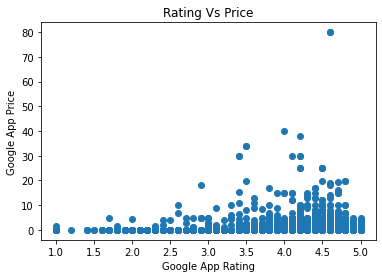

In [56]:
#Scatter plot for Rating Vs. Price

plt.scatter(GoogleApp_filtred.Rating,GoogleApp_filtred.Price_float)
plt.xlabel('Google App Rating')
plt.ylabel('Google App Price')
plt.title('Rating Vs Price')
plt.show()

In [57]:
#Most of the apps has higher rating with respect to price. Also looks like rating increase with price

#### 2. Make scatter plot/joinplot for Rating vs. Size
##### 1. Are heavier apps rated better?

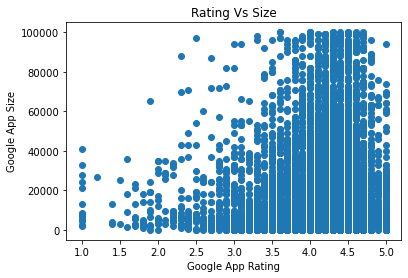

In [58]:
#Scatter plot for Rating Vs. Size_Multiply_1000

plt.scatter(GoogleApp_filtred.Rating,GoogleApp_filtred.Size_Multiply_1000)
plt.xlabel('Google App Rating')
plt.ylabel('Google App Size')
plt.title('Rating Vs Size')
plt.show()

In [59]:
#Most of the apps has higher rating irrespective of the bigger size. Looks like heavier apps are rated better.

#### 3.Make scatter plot/joinplot for Rating vs. Reviews
##### 1. Does more review mean a better rating always?

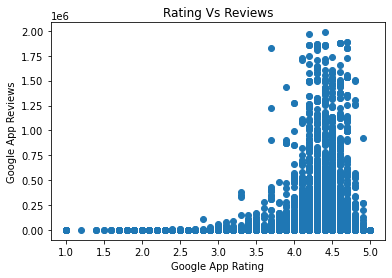

In [60]:
#Scatter plot for Rating Vs. Reviews

plt.scatter(GoogleApp_filtred.Rating,GoogleApp_filtred.Reviews_int)
plt.xlabel('Google App Rating')
plt.ylabel('Google App Reviews')
plt.title('Rating Vs Reviews')
plt.show()

In [61]:
#Yes, better rating apps will always has more reviews. Apps with most reviews will also be having higher rating.

#### 4. Make boxplot for Rating vs. Content Rating

##### 1. Is there any difference in the ratings? Are some types liked better?

In [62]:
# View the Plot in bigger size.

plt.rcParams['figure.figsize'] = (10,7)

<AxesSubplot:xlabel='Content Rating', ylabel='Rating'>

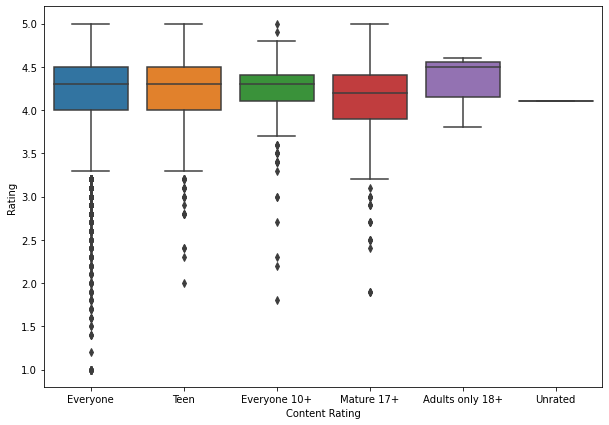

In [63]:
#Box Plot for Rating Vs. Content Rating

sns.boxplot(x=GoogleApp_filtred['Content Rating'],y=GoogleApp_filtred['Rating'])

In [64]:
#Most of the rating given by Content Rating categories are similar and are more than 4. Rating given by adults only 18+ 
#are higher and no rating is given below 4

#### 5. Make boxplot for Ratings vs. Category

##### 1. Which genre has the best ratings?

In [65]:
#plt.rcParams['figure.figsize'] = (30,15)

In [66]:
# Boxplot for Ratings vs. Category

#sns.boxplot(x=GoogleApp_filtred.Category,y=GoogleApp_filtred.Rating)

In [67]:
#To view the grap in big size

plt.rcParams['figure.figsize'] = (16,9)

<AxesSubplot:xlabel='Rating', ylabel='Category'>

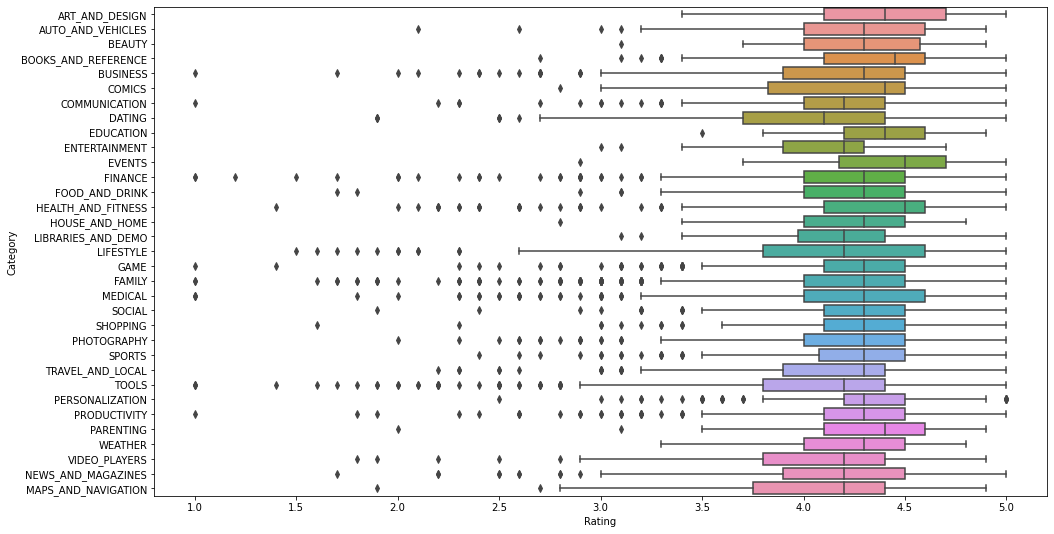

In [68]:
#Boxplot for Rating Vs Category

sns.boxplot(x=GoogleApp_filtred.Rating,y=GoogleApp_filtred.Category)

In [69]:
#Following Genres has good rating. 
#Events, Health and Fitness, Books and Reference, Comics and Education.


### 8. Data preprocessing
#### For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
#### 1. Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. Apply log transformation (np.log1p) to Reviews and Installs.

In [70]:
# Create a copy of GoogleApp_filtred dataframe and named as inp1.

inp1 = GoogleApp_filtred.copy()
inp1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,Mb_exists,Size_Multiply_1000,Reviews_int,Installs_numeric,Installs_int,Price_numeric,Price_float,Price_High,Reviews_High,Outlier
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,...,2,19000.0,159,10000,10000,0,0.0,False,False,False
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,...,2,14000.0,967,500000,500000,0,0.0,False,False,False
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,...,3,8700.0,87510,5000000,5000000,0,0.0,False,False,False
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,...,2,25000.0,215644,50000000,50000000,0,0.0,False,False,False
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,...,3,2800.0,967,100000,100000,0,0.0,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.6M,500+,Free,0,Everyone,Education,...,3,2600.0,7,500,500,0,0.0,False,False,False
9356,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,...,2,53000.0,38,5000,5000,0,0.0,False,False,False
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,...,3,3600.0,4,100,100,0,0.0,False,False,False
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,...,-1,0.0,114,1000,1000,0,0.0,False,False,False


In [71]:
inp1.shape

(8810, 25)

In [72]:
# Apply log transformation (np.log1p) - Reviews

inp1['log1p_Reviews'] = np.log1p(inp1.Reviews_int)
inp1.loc[:,['App','Category','Rating','Reviews','log1p_Reviews']]

,App,Category,Rating,Reviews,log1p_Reviews
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,5.075174
1,Coloring book moana,ART_AND_DESIGN,3.9,967,6.875232
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,11.379520
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,12.281389
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,6.875232
...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.079442
9356,Sya9a Maroc - FR,FAMILY,4.5,38,3.663562
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,1.609438
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,4.744932


In [73]:
# Apply log transformation (np.log1p) - Installs

inp1['log1p_Installs'] = np.log1p(inp1.Installs_int)
inp1.loc[:,['App','Category','Rating','Reviews','log1p_Reviews','Installs_numeric','log1p_Installs']]

,App,Category,Rating,Reviews,log1p_Reviews,Installs_numeric,log1p_Installs
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,5.075174,10000,9.210440
1,Coloring book moana,ART_AND_DESIGN,3.9,967,6.875232,500000,13.122365
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,11.379520,5000000,15.424949
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,12.281389,50000000,17.727534
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,6.875232,100000,11.512935
...,...,...,...,...,...,...,...
9355,FR Calculator,FAMILY,4.0,7,2.079442,500,6.216606
9356,Sya9a Maroc - FR,FAMILY,4.5,38,3.663562,5000,8.517393
9357,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,1.609438,100,4.615121
9358,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,4.744932,1000,6.908755


#### 2. Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.

In [74]:
#View all the column names

inp1.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'Size_numeric', 'Size_numeric_float', 'Mb_exists',
       'Size_Multiply_1000', 'Reviews_int', 'Installs_numeric', 'Installs_int',
       'Price_numeric', 'Price_float', 'Price_High', 'Reviews_High', 'Outlier',
       'log1p_Reviews', 'log1p_Installs'],
      dtype='object')

In [75]:
# Drop columns App, Last Updated, Current Ver, and Android Ver

inp1 = pd.DataFrame(inp1.drop(['App','Last Updated','Current Ver','Android Ver'],axis=1))

In [76]:
#Drop the following columns : Type, Reviews, size,installs, price, size_numeric, mb exists, installs_numeric, price_numeric,price high, reviews high, outlier.
#As these column are created to derive the numeric fields from the given dataset. Not usefull for linear regression.

inp1 = pd.DataFrame(inp1.drop(['Type','Reviews','Size','Installs','Price','Size_numeric','Size_numeric_float','Mb_exists','Installs_numeric','Price_numeric','Price_High','Reviews_High','Outlier'],axis=1))
inp1

,Category,Rating,Content Rating,Genres,Size_Multiply_1000,Reviews_int,Installs_int,Price_float,log1p_Reviews,log1p_Installs
0,ART_AND_DESIGN,4.1,Everyone,Art & Design,19000.0,159,10000,0.0,5.075174,9.210440
1,ART_AND_DESIGN,3.9,Everyone,Art & Design;Pretend Play,14000.0,967,500000,0.0,6.875232,13.122365
2,ART_AND_DESIGN,4.7,Everyone,Art & Design,8700.0,87510,5000000,0.0,11.379520,15.424949
3,ART_AND_DESIGN,4.5,Teen,Art & Design,25000.0,215644,50000000,0.0,12.281389,17.727534
4,ART_AND_DESIGN,4.3,Everyone,Art & Design;Creativity,2800.0,967,100000,0.0,6.875232,11.512935
...,...,...,...,...,...,...,...,...,...,...
9355,FAMILY,4.0,Everyone,Education,2600.0,7,500,0.0,2.079442,6.216606
9356,FAMILY,4.5,Everyone,Education,53000.0,38,5000,0.0,3.663562,8.517393
9357,FAMILY,5.0,Everyone,Education,3600.0,4,100,0.0,1.609438,4.615121
9358,BOOKS_AND_REFERENCE,4.5,Mature 17+,Books & Reference,0.0,114,1000,0.0,4.744932,6.908755


#### 3. Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be numeric. Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.

In [77]:
# Create dummy columns for Category, Genres, Content Rating

inp2 = pd.get_dummies(inp1,prefix_sep='_',columns = ['Category','Genres','Content Rating'])
inp2

,Rating,Size_Multiply_1000,Reviews_int,Installs_int,Price_float,log1p_Reviews,log1p_Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,4.1,19000.0,159,10000,0.0,5.075174,9.210440,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,3.9,14000.0,967,500000,0.0,6.875232,13.122365,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,4.7,8700.0,87510,5000000,0.0,11.379520,15.424949,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4.5,25000.0,215644,50000000,0.0,12.281389,17.727534,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4.3,2800.0,967,100000,0.0,6.875232,11.512935,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,4.0,2600.0,7,500,0.0,2.079442,6.216606,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9356,4.5,53000.0,38,5000,0.0,3.663562,8.517393,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9357,5.0,3600.0,4,100,0.0,1.609438,4.615121,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9358,4.5,0.0,114,1000,0.0,4.744932,6.908755,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [78]:
inp2.shape

(8810, 161)

### 9. Train test split  and apply 70-30 split. Name the new dataframes df_train and df_test.

##### Model validation - Training and test data split with MultipleLinearRegression

In [79]:
# Split the dataframe for X

x = pd.DataFrame(inp2.drop(['Rating'],axis=1))
x

,Size_Multiply_1000,Reviews_int,Installs_int,Price_float,log1p_Reviews,log1p_Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
0,19000.0,159,10000,0.0,5.075174,9.210440,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,14000.0,967,500000,0.0,6.875232,13.122365,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,8700.0,87510,5000000,0.0,11.379520,15.424949,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,25000.0,215644,50000000,0.0,12.281389,17.727534,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,2800.0,967,100000,0.0,6.875232,11.512935,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9355,2600.0,7,500,0.0,2.079442,6.216606,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9356,53000.0,38,5000,0.0,3.663562,8.517393,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9357,3600.0,4,100,0.0,1.609438,4.615121,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9358,0.0,114,1000,0.0,4.744932,6.908755,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [80]:
# Split the dataframe for Y

y = inp2['Rating']
y

0       4.1
1       3.9
2       4.7
3       4.5
4       4.3
       ... 
9355    4.0
9356    4.5
9357    5.0
9358    4.5
9359    4.5
Name: Rating, Length: 8810, dtype: float64

### 10. Separate the dataframes into X_train, y_train, X_test, and y_test.

In [81]:
#Split the dataframe into 70-30 split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=.30)

In [82]:
# View the number of records in the training data and test data

print("Shape of original dataset :", inp2.shape)
print("Shape of Input - training set 'x_train' :", x_train.shape)
print("Shape of Input - testing set 'x_test' :", x_test.shape)
print("Shape of Output - training set 'y_train' :", y_train.shape)
print("Shape of Output - testing set 'y_test' :", y_test.shape)

Shape of original dataset : (8810, 161)
Shape of Input - training set 'x_train' : (6167, 160)
Shape of Input - testing set 'x_test' : (2643, 160)
Shape of Output - training set 'y_train' : (6167,)
Shape of Output - testing set 'y_test' : (2643,)


#### Name the new dataframes with 70% as training data as df_train

In [83]:
#View the Records in the Training data

df_train = pd.concat([x_train,pd.DataFrame(y_train,columns=['Rating'])],axis=1)
df_train

,Size_Multiply_1000,Reviews_int,Installs_int,Price_float,log1p_Reviews,log1p_Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating
1469,28000.0,60170,1000000,0.0,11.004946,13.815512,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.5
7645,0.0,4441,100000,0.0,8.398860,11.512935,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.3
447,1600.0,255,10000,0.0,5.545177,9.210440,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.1
7100,7900.0,25,5000,0.0,3.258097,8.517393,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.4
8378,31000.0,20421,1000000,0.0,9.924368,13.815512,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2640,6500.0,94205,1000000,0.0,11.453239,13.815512,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.6
7629,4900.0,72161,1000000,0.0,11.186669,13.815512,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.4
6874,4900.0,2548,100000,0.0,7.843456,11.512935,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.8
6390,4400.0,8,100,0.0,2.197225,4.615121,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.1


In [84]:
# View the number of records in the training dataframe

df_train.shape

(6167, 161)

#### Name the new dataframes with 30% as testing data as df_test

In [85]:
#View the Records in the Test data

df_test = pd.concat([x_test,pd.DataFrame(y_test,columns=['Rating'])],axis=1)
df_test

,Size_Multiply_1000,Reviews_int,Installs_int,Price_float,log1p_Reviews,log1p_Installs,Category_ART_AND_DESIGN,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,...,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Content Rating_Adults only 18+,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated,Rating
1945,24000.0,48615,10000000,0.00,10.791708,16.118096,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.7
2195,0.0,319,5000,3.99,5.768321,8.517393,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.6
6488,12000.0,190,10000,0.00,5.252273,9.210440,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.7
8695,2500.0,7,1000,0.00,2.079442,6.908755,0,0,0,0,...,0,0,0,0,1,0,0,0,0,3.6
2467,15000.0,479909,10000000,0.00,13.081354,16.118096,0,0,0,0,...,0,0,0,0,0,0,1,0,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1362,40000.0,4642,100000,0.00,8.443116,11.512935,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.6
969,2800.0,456,50000,0.00,6.124683,10.819798,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.3
8973,73.0,981,100000,0.00,6.889591,11.512935,0,0,0,0,...,0,0,0,0,1,0,0,0,0,4.1
7688,5600.0,93,10000,0.00,4.543295,9.210440,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.2


In [86]:
#View the number of records in the test dataframe

df_test.shape

(2643, 161)

### Question 11 . Model building

#### Use linear regression as the technique

In [87]:
# Building model on training data

from sklearn.linear_model import LinearRegression
Model_Training_Data = LinearRegression().fit(x_train,y_train)

### Question 12: 
#### Make predictions on test set and report R2.

In [88]:
# Using the Model build on the Training data making predictions on test data

Predicted_values = Model_Training_Data.predict(x_test)

In [89]:
#View the length of Test data - X_test

len(x_test)

2643

In [90]:
#View the length of Predicted values

len(Predicted_values)

2643

In [91]:
#Based on the Model build on training data. Predicted the rating for the apps in the test data and combined in a single dataframe.

df_test = pd.concat([x_test.reset_index(drop=True),y_test.reset_index(drop=True),pd.DataFrame(Predicted_values,columns=['Pred_Rating'])],axis=1)
df_test.loc[:,['Size_Multiply_1000','Reviews_int','Installs_int','Price_float','log1p_Reviews','log1p_Installs','Rating','Pred_Rating']]

,Size_Multiply_1000,Reviews_int,Installs_int,Price_float,log1p_Reviews,log1p_Installs,Rating,Pred_Rating
0,24000.0,48615,10000000,0.00,10.791708,16.118096,4.7,4.097683
1,0.0,319,5000,3.99,5.768321,8.517393,4.6,4.373667
2,12000.0,190,10000,0.00,5.252273,9.210440,3.7,4.260747
3,2500.0,7,1000,0.00,2.079442,6.908755,3.6,3.770830
4,15000.0,479909,10000000,0.00,13.081354,16.118096,4.0,4.417938
...,...,...,...,...,...,...,...,...
2638,40000.0,4642,100000,0.00,8.443116,11.512935,4.6,4.377653
2639,2800.0,456,50000,0.00,6.124683,10.819798,4.3,4.337726
2640,73.0,981,100000,0.00,6.889591,11.512935,4.1,3.973307
2641,5600.0,93,10000,0.00,4.543295,9.210440,4.2,4.019033


In [92]:
#View the Error Percentage for the test data

df_test['Err_pct'] = abs(df_test.Rating-df_test.Pred_Rating)/df_test.Rating
df_test.loc[:,['Size_Multiply_1000','Reviews_int','Installs_int','Price_float','log1p_Reviews','log1p_Installs','Rating','Pred_Rating','Err_pct']]

,Size_Multiply_1000,Reviews_int,Installs_int,Price_float,log1p_Reviews,log1p_Installs,Rating,Pred_Rating,Err_pct
0,24000.0,48615,10000000,0.00,10.791708,16.118096,4.7,4.097683,0.128153
1,0.0,319,5000,3.99,5.768321,8.517393,4.6,4.373667,0.049203
2,12000.0,190,10000,0.00,5.252273,9.210440,3.7,4.260747,0.151553
3,2500.0,7,1000,0.00,2.079442,6.908755,3.6,3.770830,0.047453
4,15000.0,479909,10000000,0.00,13.081354,16.118096,4.0,4.417938,0.104485
...,...,...,...,...,...,...,...,...,...
2638,40000.0,4642,100000,0.00,8.443116,11.512935,4.6,4.377653,0.048336
2639,2800.0,456,50000,0.00,6.124683,10.819798,4.3,4.337726,0.008773
2640,73.0,981,100000,0.00,6.889591,11.512935,4.1,3.973307,0.030901
2641,5600.0,93,10000,0.00,4.543295,9.210440,4.2,4.019033,0.043087


In [93]:
# Accuracy rate
Accracy_rate = 1 - np.mean(df_test.Err_pct)
print("Accracy rate : ",Accracy_rate)
Accuracy_Percentage = "{:.0%}".format(Accracy_rate)
print("Accuracy Percentage : ",Accuracy_Percentage)



Accracy rate :  0.9056558420506314
Accuracy Percentage :  91%


In [94]:
#R2 on Test Data

from sklearn.metrics import r2_score
R2_on_test_data =  r2_score(y_test,Predicted_values)
print("R2 on test data : ", R2_on_test_data)
R2_on_test_data_percentage =  "{:.0%}".format(R2_on_test_data)
print("R2 on test data Percentage : ", R2_on_test_data_percentage)


R2 on test data :  0.13811649296347805
R2 on test data Percentage :  14%


##### Through the Multiple Linear Regression model build on the GoogleApp data.
##### Accuracy Percentage is = 90%. 
##### R2 Value is 11%

In [95]:
# Using the Model build on the Training data after testin on the test data - making predictions on training data

Predicted_values_train = Model_Training_Data.predict(x_train)

In [96]:
# View R2 on Training Data

R2_percentage = "{:.0%}".format(r2_score(y_train,Predicted_values_train))
print("R2 on Training Data percentage : ",R2_percentage)

R2 on Training Data percentage :  16%
